In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(14999, 10)

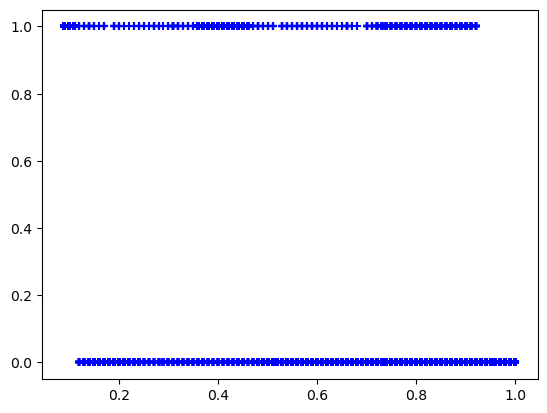

In [11]:
plt.scatter(df['satisfaction_level'],df['left'],marker='+',color='blue')

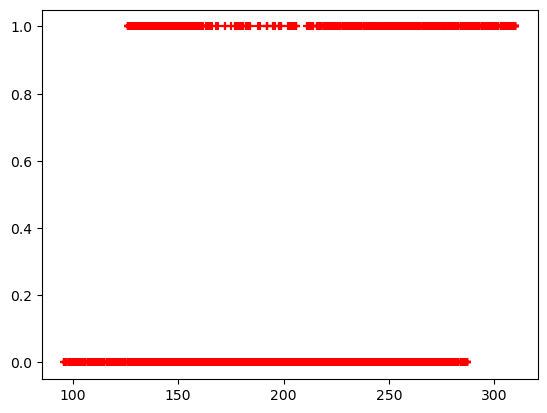

In [14]:
plt.scatter(df['average_montly_hours'],df['left'],marker='+',color='red')

# Want to check how many employees left and retained in the company

In [25]:
df[df['left']==1].shape # left==1 means already left

(3571, 10)

In [27]:
df[df['left']==0].shape # left==0 means retained

(11428, 10)

# Let's find out the relation between dependent and feature variables

In [31]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [32]:
df.groupby('left')

# As Department and Salary are in string format, those have been dropped

In [44]:
df1=df.drop(['Department','salary'],axis='columns')
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [45]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Conclusions from the above table:

1. Those retained have higher satisfication level compared to left
2. No. of hours worked more who left than retained
3. Those left has lesser promotions compared to left.

#  We will consider these 3 factors as feature variables and 1 string column- Salary as well for the logistics regression

In [47]:
df2= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# As salary has text data, we need to convert text to numbers hence applying dummy variables

In [53]:
salary_dummies=pd.get_dummies(df2.salary,prefix="salary").astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [56]:
df2_with_dummies=pd.concat([df2,salary_dummies],axis='columns')
df2_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [58]:
df2_with_dummies.drop('salary',axis='columns',inplace=True)
df2_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [75]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [76]:
X=df2_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [77]:
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=1000)

In [84]:
X_test.tail()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
12229,0.78,239,0,0,1,0
2428,0.65,250,0,0,1,0
4633,0.19,158,0,1,0,0
11589,0.78,135,0,0,0,1
5978,0.56,275,0,0,0,1


In [81]:
model.fit(X,y)

LogisticRegression()

In [82]:
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [87]:
model.score(X_test,y_test)

0.7793333333333333